In [1]:
import pandas as pd
data = pd.read_csv('Stat_32by32/data_on_1000_instance_2.txt')
data = data[data['Solved'] != 0]

In [2]:
data.head(5)

,Agent,Seed,Heuristic,Solved,HNode,LNode,Time,Makespan,SOC,SOL
0,50,0,ML,1,44,200,74,43,1320,1184
1,50,0,distance,1,44,198,31,43,1326,1193
2,50,0,conflict,1,51,227,31,50,1333,1188
3,50,0,neighbour,1,62,292,33,57,1417,1248
4,50,1,ML,1,59,263,53,58,1434,1307


In [3]:
data.groupby(['Agent', 'Heuristic'])['Solved'].sum()

Agent  Heuristic
50     ML           500
       conflict     500
       distance     500
       neighbour    500
100    ML           500
       conflict     500
       distance     500
       neighbour    500
150    ML           500
       conflict     500
       distance     500
       neighbour    500
200    ML           500
       conflict     500
       distance     500
       neighbour    500
250    ML           500
       conflict     500
       distance     500
       neighbour    500
Name: Solved, dtype: int64

In [16]:
# Accuracy
for agent, group in data.groupby('Agent'):
    print(f"Group: {agent}")
    print(group.groupby('Heuristic')['Makespan'].sum())


Group: 50
Heuristic
ML           23948
conflict     25237
distance     23817
neighbour    28155
Name: Makespan, dtype: int64
Group: 100
Heuristic
ML           25952
conflict     29543
distance     25413
neighbour    38718
Name: Makespan, dtype: int64
Group: 150
Heuristic
ML           28098
conflict     34426
distance     26591
neighbour    49872
Name: Makespan, dtype: int64
Group: 200
Heuristic
ML           30775
conflict     39817
distance     27817
neighbour    63508
Name: Makespan, dtype: int64
Group: 250
Heuristic
ML           33690
conflict     47308
distance     29458
neighbour    77185
Name: Makespan, dtype: int64


In [7]:
# group by agent
grouped_A = data.groupby('Agent')
agent_wise_data = {}
for Agent, group_A in grouped_A:
    print(f"Group: {Agent}")
    print(type(group_A))    
    agent_wise_data[Agent] = group
    

Group: 50
<class 'pandas.core.frame.DataFrame'>
Group: 100
<class 'pandas.core.frame.DataFrame'>
Group: 150
<class 'pandas.core.frame.DataFrame'>
Group: 200
<class 'pandas.core.frame.DataFrame'>
Group: 250
<class 'pandas.core.frame.DataFrame'>


In [8]:
agent_wise_data[50].head(3)

,Agent,Seed,Heuristic,Solved,HNode,LNode,Time,Makespan,SOC,SOL
8000,250,0,ML,1,69,313,66,67,10095,8579
8001,250,0,distance,1,57,258,55,56,9532,8294
8002,250,0,conflict,1,69,314,57,68,10587,8620


In [9]:
a_50 = agent_wise_data[200]
a_50_g = a_50.groupby('Seed')
a_50_g['SOC'].sum()

Seed
0      44602
1      41582
2      42339
3      44721
4      42289
       ...  
495    42169
496    46008
497    41347
498    39626
499    39793
Name: SOC, Length: 500, dtype: int64

In [14]:
g_val = 'Seed'
matrix = 'SOC'
min_values = a_50.groupby(g_val)[matrix].min()

# Filtering the rows with the minimum value for each 'seed'
min_value_rows = a_50[a_50.set_index([g_val, matrix]).index.isin(min_values.reset_index().set_index([g_val, matrix]).index)]

# Counting the occurrences of each 'heuristic' in the result
count_by_heuristic = min_value_rows['Heuristic'].value_counts()
print(count_by_heuristic)

Heuristic
distance    334
ML          167
Name: count, dtype: int64


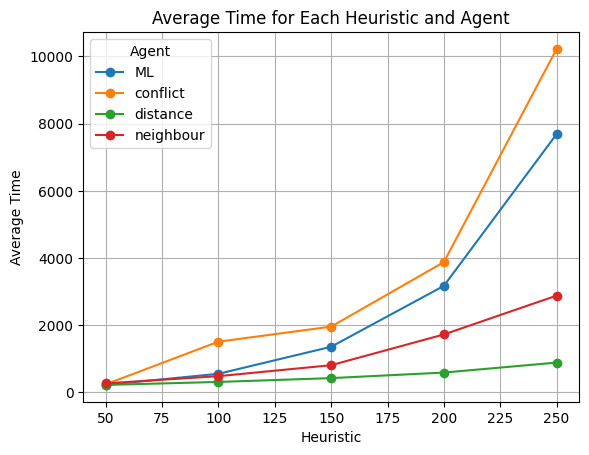

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# Replace 'your_dataframe.csv' with the actual filename if you are reading from a CSV file
# df = pd.read_csv('your_dataframe.csv')

# Example dataframe creation
df= data

# Group by 'agent' and 'heuristic', calculate the average time for each group
grouped_df = df.groupby(['Agent', 'Heuristic']).mean().reset_index()

# Pivot the table to have 'agent' as columns, 'heuristic' as index, and 'time' as values
pivot_df = grouped_df.pivot(index='Agent', columns='Heuristic', values='LNode')

# Plot the data using a line chart
pivot_df.plot(kind='line', marker='o')
plt.xlabel('Heuristic')
plt.ylabel('Average Time')
plt.title('Average Time for Each Heuristic and Agent')
plt.legend(title='Agent')
plt.grid(True)
plt.show()


IndexError: Too many levels: Index has only 1 level, not 2

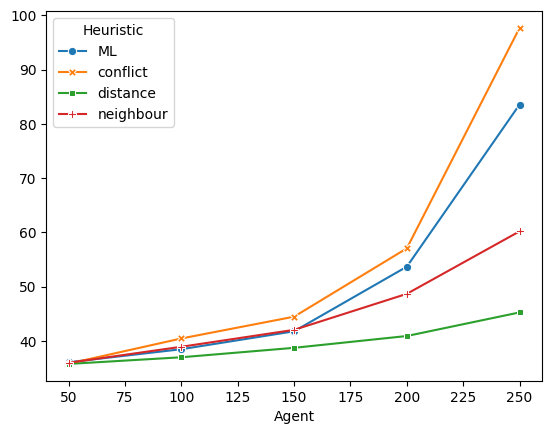

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# Replace 'your_dataframe.csv' with the actual filename if you are reading from a CSV file
# df = pd.read_csv('your_dataframe.csv')



df = data

# Group by 'Agent' and 'Heuristic', calculate the average time and standard deviation for each group
grouped_df = df.groupby(['Agent', 'Heuristic']).agg({'Time': ['mean', 'std']}).reset_index()

# Pivot the table to have 'Heuristic' as columns, 'Agent' as index, and 'Time' as values
pivot_df = grouped_df.pivot(index='Agent', columns='Heuristic', values=('Time', 'mean'))

# Plot the data using a line chart
sns.lineplot(data=pivot_df, markers=True, dashes=False)

# Manually add shaded error band (standard deviation)
for col in pivot_df.columns.get_level_values(1):
    plt.fill_between(pivot_df.index, pivot_df[('Time', 'mean', col)] - pivot_df[('Time', 'std', col)],
                     pivot_df[('Time', 'mean', col)] + pivot_df[('Time', 'std', col)], alpha=0.2)

plt.xlabel('Agent')
plt.ylabel('Average Time')
plt.title('Average Time for Each Agent and Heuristic with Standard Deviation')
plt.legend(title='Heuristic')
plt.show()